In [1]:
import os
import glob

import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

move image & mask CelebAMask to folder images & masks

In [2]:
!rm -rf images & rm -rf masks
!mkdir images & mkdir masks
!cp -a CelebAMask-HQ/CelebAMask-HQ-mask-anno/*/*_hair.png masks
!cp -a CelebAMask-HQ/CelebA-HQ-img/. images

In [3]:
# Check folder image / masks

path_images = glob.glob("images/*")
path_masks = glob.glob("masks/*")

print(f'images: {len(path_images)}')
print(f'masks: {len(path_masks)}')

Rename image

In [5]:
for path_image in path_images:
    basename = os.path.basename(path_image)
    new_basename = '0'*(9-len(basename))+ basename
    os.rename(path_image, path_image.replace(basename, new_basename))

Rename mask

In [6]:
for path in path_masks:
    os.rename(path, path.replace('_hair', ''))

In [7]:
i = 0
for name in os.listdir("images"):
    path_mask = "masks/{}".format(name.replace('.jpg', ".png"))
    if not os.path.isfile(path_mask):
        os.remove("images/{}".format(name))
#         print(path_mask)
        i += 1
print (i)

700


In [8]:
path_images = glob.glob("images/*")
path_masks = glob.glob("masks/*")

print(f'images: {len(path_images)}')
print(f'masks: {len(path_masks)}')

images: 29300
masks: 29300


(1024, 1024, 3) (512, 512, 3)
[  0 255]


Text(0.5, 1.0, 'Mask')

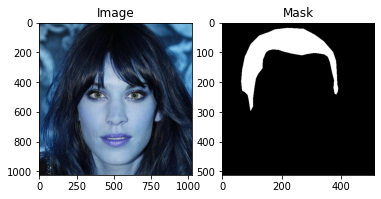

In [9]:
image = cv2.imread(path_images[0])
mask = cv2.imread(path_masks[0])
print(image.shape, mask.shape)
print(np.unique(mask))

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
plt.imshow(image)
a.set_title('Image')
a = fig.add_subplot(1, 2, 2)
plt.imshow(mask)
a.set_title('Mask')

Split

In [10]:
def split(folder='train', rate=0.6):
    path_images = glob.glob("images/*")
        
    os.makedirs(f'{folder}/image')
    os.makedirs(f'{folder}/mask')
    
    for i in range(int(len(path_images)*rate)):
        path_image = path_images[i]
        path_mask = path_images[i].replace('images', 'masks').replace('jpg', 'png')
        
        new_path_image = path_image.replace('images', f'{folder}/image')
        new_path_mask = path_mask.replace('masks', f'{folder}/mask')
        
        os.rename(path_image, new_path_image)
        os.rename(path_mask, new_path_mask)

In [12]:
!rm -rf train/
!rm -rf test/
!rm -rf val/

split('train', 0.6)
split('test', 0.5)
split('val', 1)

In [ ]:
!rm -rf train/